In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 9

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.drop('PassengerId', axis=1, inplace=True)

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(f"the train data has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"the test data has {test.shape[0]} rows and {test.shape[1]} columns")

the train data has 891 rows and 11 columns
the test data has 418 rows and 11 columns


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


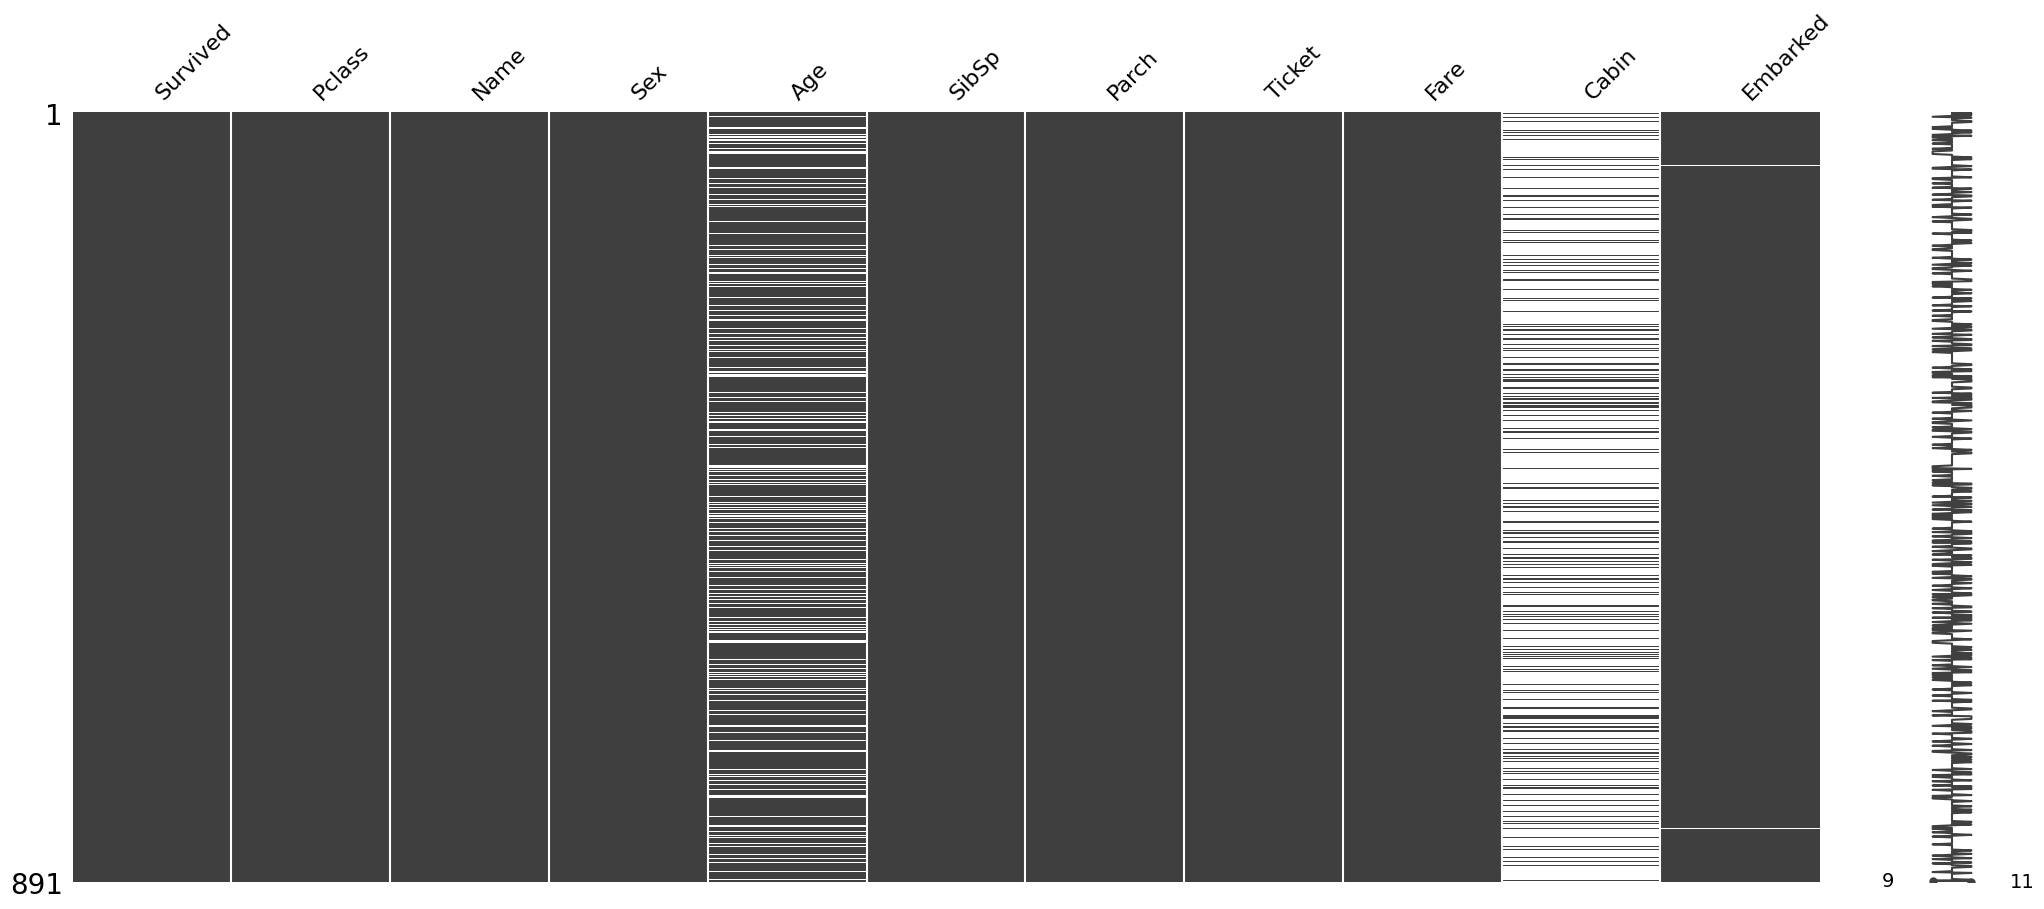

In [9]:
import missingno as msno
msno.matrix(train)
plt.show()

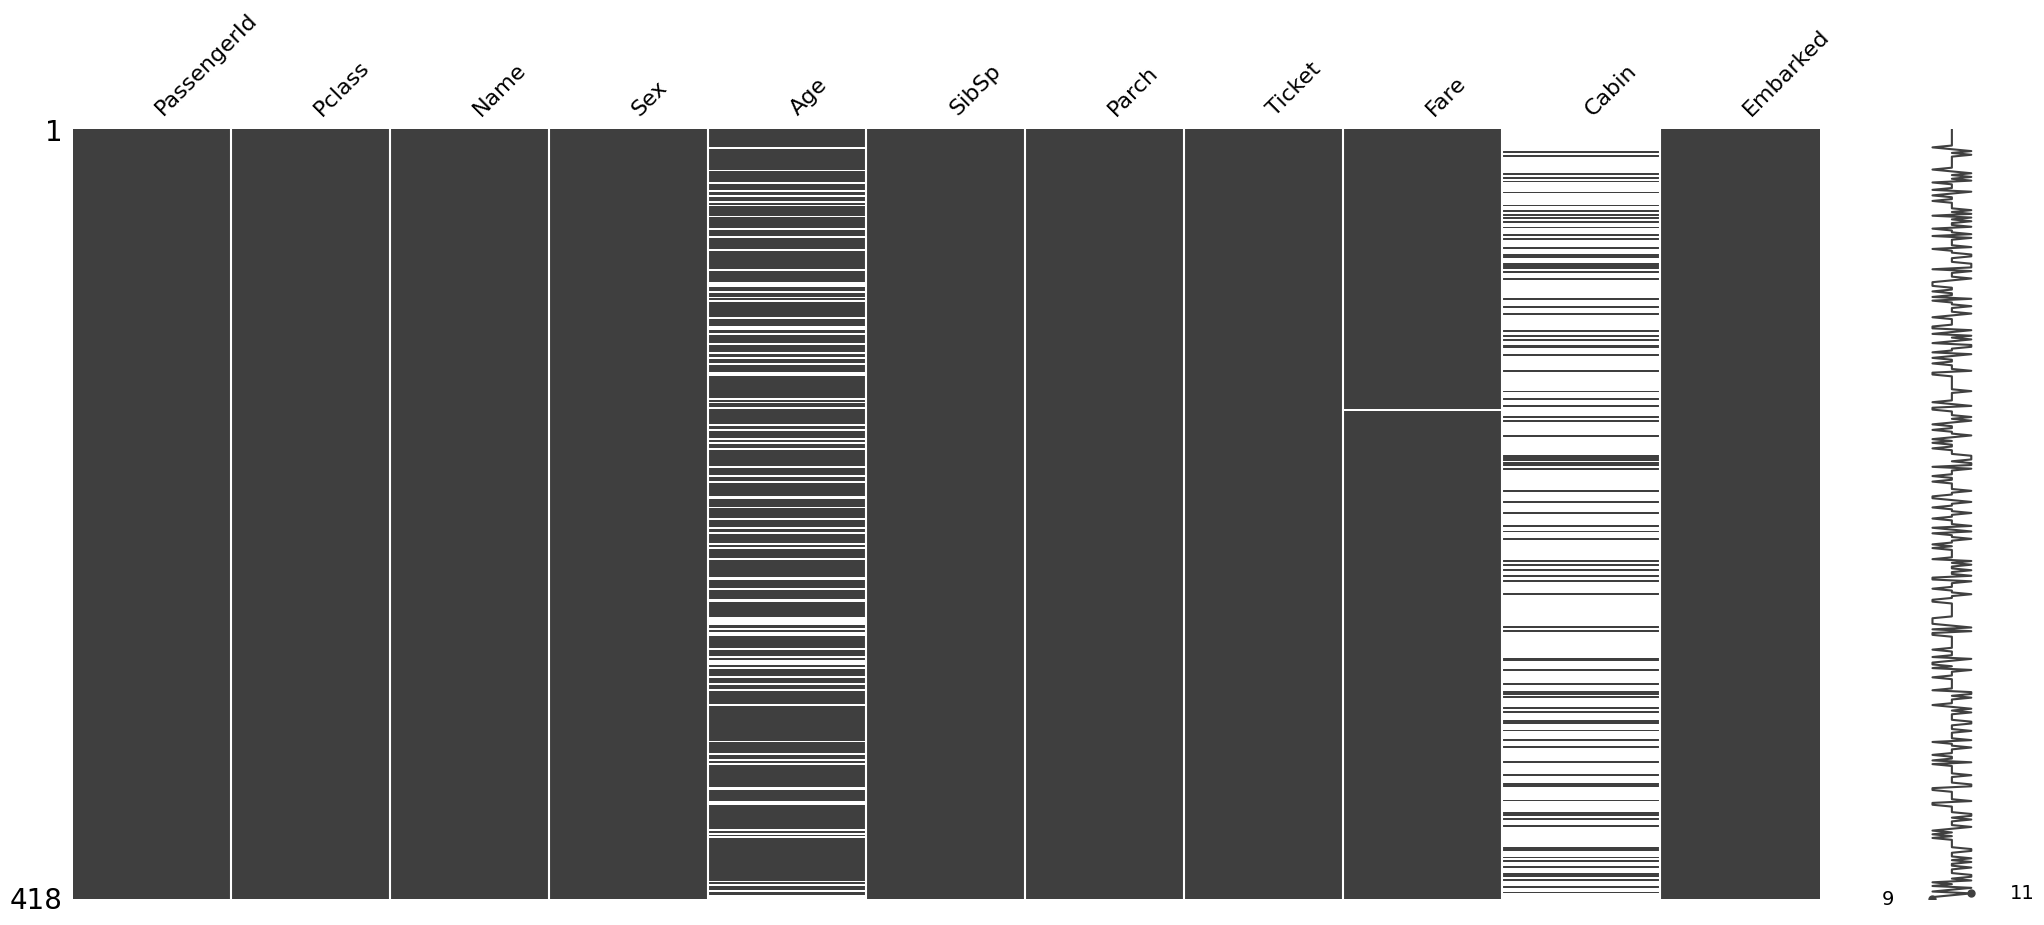

In [10]:
msno.matrix(test)
plt.show()

In [11]:
train_missing_values = train.isnull().sum()
train_missing_values = train_missing_values[train_missing_values > 0]
train_missing_values

Age         177
Cabin       687
Embarked      2
dtype: int64

In [12]:
test_missing_values = test.isnull().sum()
test_missing_values = test_missing_values[test_missing_values > 0]
test_missing_values

Age       86
Fare       1
Cabin    327
dtype: int64

In [13]:
target = 'Survived'
target_dist = train[target].value_counts()
target_dist

0    549
1    342
Name: Survived, dtype: int64

In [14]:
# calculate the percentage of missing values in each column
class_proportions = target_dist / train.shape[0]
class_proportions = class_proportions.values.tolist()
class_proportions_str = [f'{prop:.2%}' for prop in class_proportions]

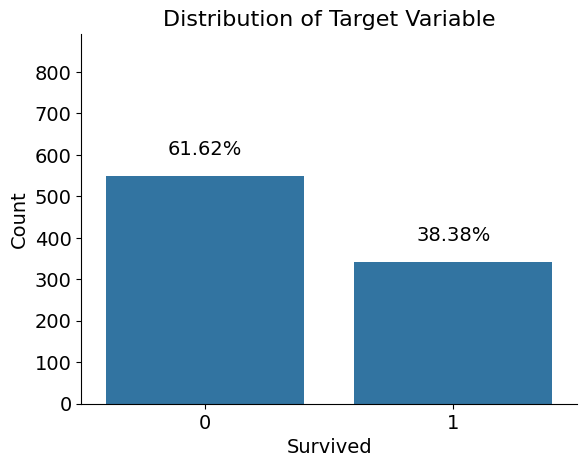

In [15]:
# plot the distribution of the target variable

sns.countplot(x=target, data=train)

plt.title('Distribution of Target Variable', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim([0, len(train)])
for i, count in enumerate(target_dist):
    plt.text(i, count + 50, class_proportions_str[i], ha='center', fontsize=14, color='black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

plt.show()

In [16]:
# Percentage  of women that survived
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
# print the percentage with two decimal places
print(f"% of women who survived:{rate_women*100:.2f}")

% of women who survived:74.20


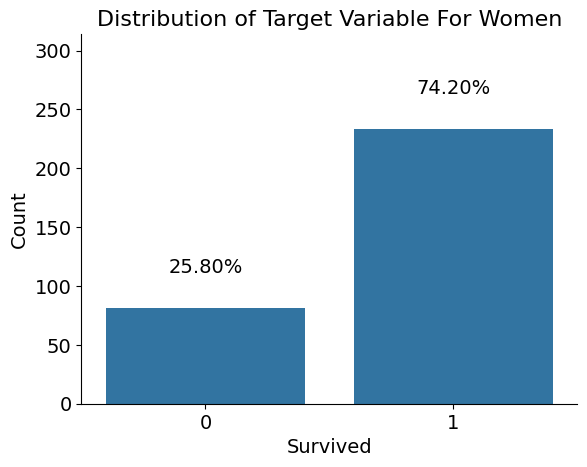

In [17]:
# Percentage of women that survived
women = train.loc[train.Sex == 'female']

women_counts = women[target].value_counts()

women_proportions = women_counts / women.shape[0]
women_proportions = women_proportions.values.tolist()
women_proportions_str = [f'{prop:.2%}' for prop in women_proportions]
women_proportions_str = women_proportions_str[::-1]
sns.countplot(x=target, data=women)

plt.title('Distribution of Target Variable For Women', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim([0, len(women)])

women_counts = women_counts.iloc[::-1]
for i, count in enumerate(women_counts):
    plt.text(i, count+30, women_proportions_str[i], ha='center', fontsize=14, color='black')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

plt.show()

In [18]:
# Percentage of men that survived
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print(f"% of men who survived: {rate_men*100:.2f}%")

% of men who survived: 18.89%


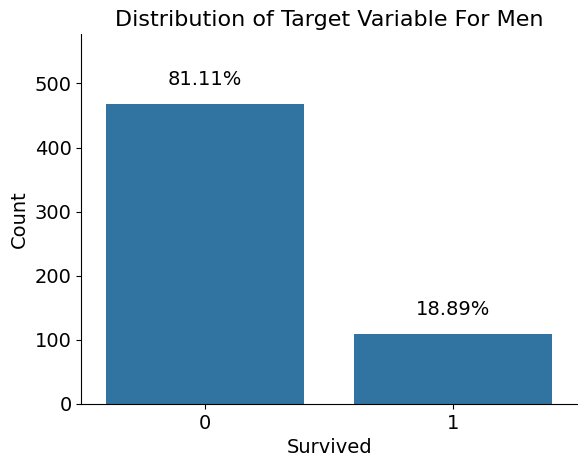

In [19]:
# Percentage of men that survived
men = train.loc[train.Sex == 'male']

men_counts = men[target].value_counts()

men_proportions = men_counts / men.shape[0]
men_proportions = men_proportions.values.tolist()
men_proportions_str = [f'{prop:.2%}' for prop in men_proportions]

sns.countplot(x=target, data=men)

plt.title('Distribution of Target Variable For Men', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim([0, len(men)])

for i, count in enumerate(men_counts):
    plt.text(i, count+30, men_proportions_str[i], ha='center', fontsize=14, color='black')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

plt.show()

In [20]:
# extract the numerical columns

num_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(num_cols)

# remove the "Survived" and "Pclass" columns
# cols to remove
cols_to_remove = ['Survived', 'Pclass']
for col in cols_to_remove:
    num_cols.remove(col)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [21]:
# numerical features
train[num_cols].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


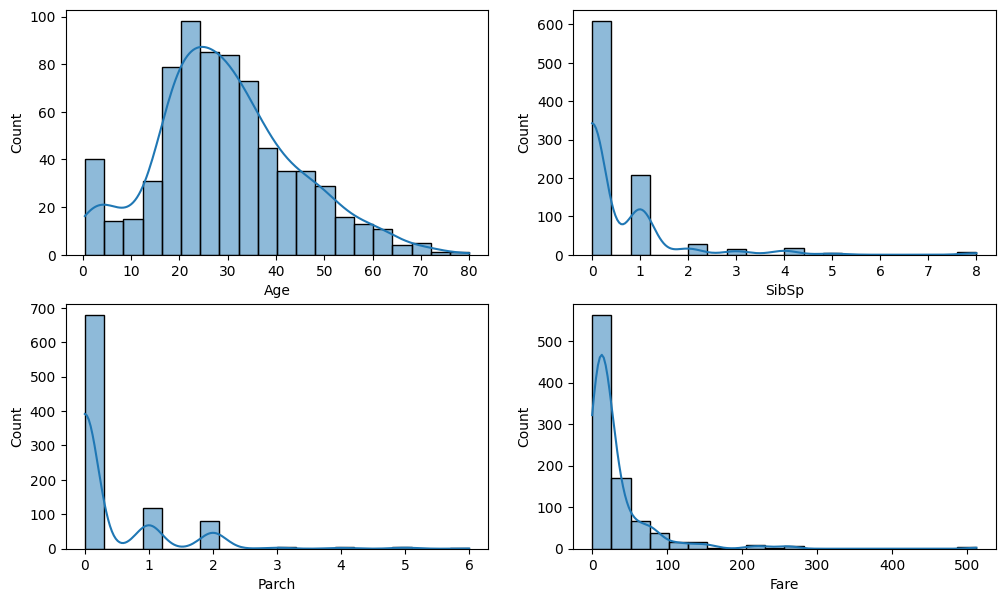

In [22]:
# histogram of numerical features for the train data

fig, axs = plt.subplots(2, 2, figsize=(12,7))
for i,col in enumerate(num_cols):
  sns.histplot(train[col],kde=True,ax = axs[i//2,i%2],bins=20)
plt.show()

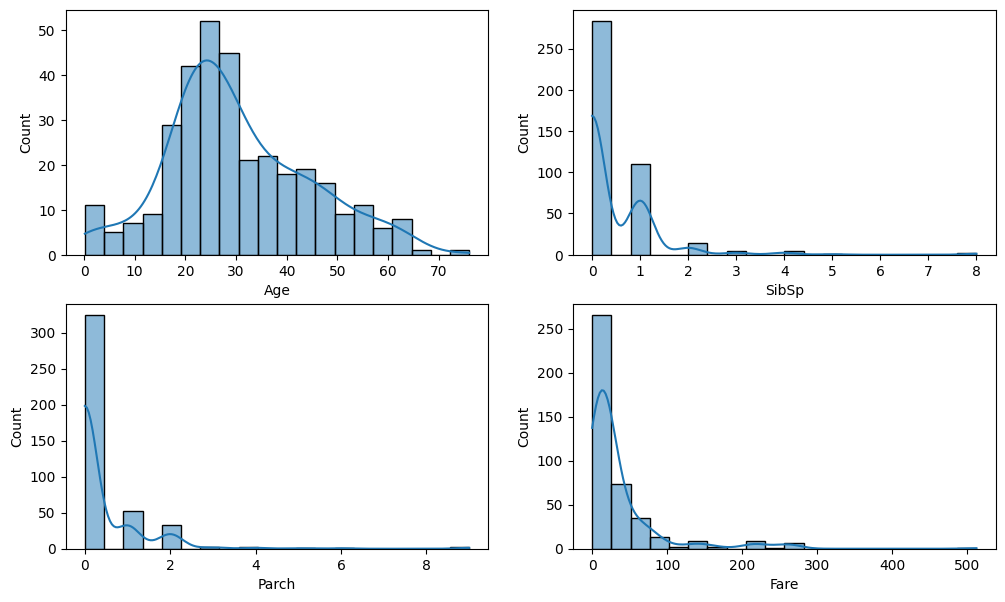

In [23]:
# histogram of numerical features for test data

fig, axs = plt.subplots(2, 2, figsize=(12,7))
for i,col in enumerate(num_cols):
  sns.histplot(test[col],kde=True,ax = axs[i//2,i%2],bins=20)
plt.show()

In [24]:
cols_to_remove = ['Parch', 'SibSp']
for col in cols_to_remove:
    num_cols.remove(col)

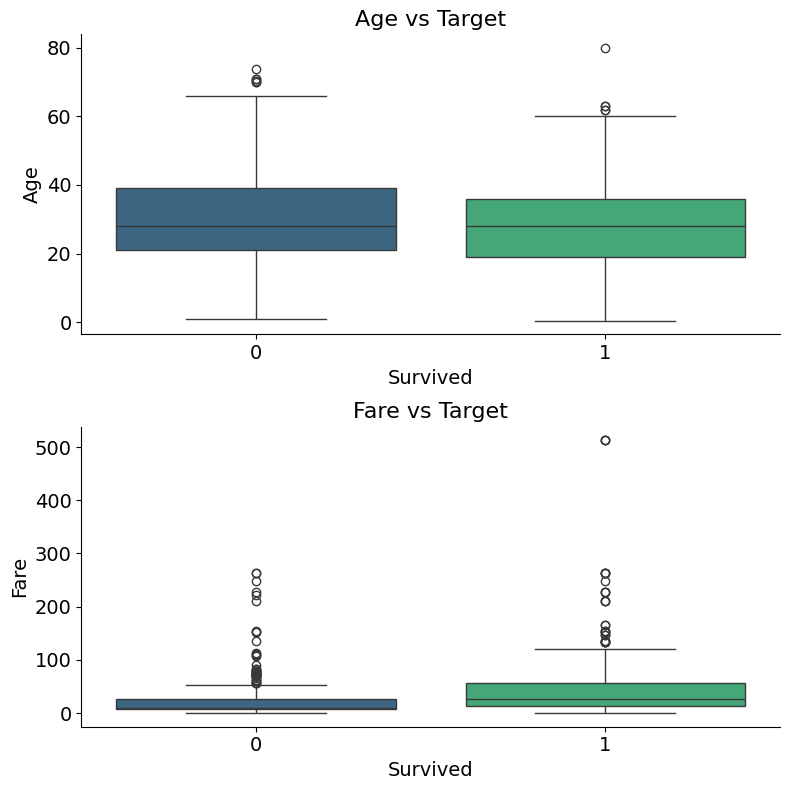

In [25]:
# Create subplots for each continuous feature
fig, axs = plt.subplots(nrows=len(num_cols), figsize=(8, 4 * len(num_cols)))
for i, col in enumerate(num_cols):
    sns.boxplot(x=target, y=col, data=train, ax=axs[i], palette='viridis')
    axs[i].set_title(f'{col.title()} vs Target', fontsize=16)
    axs[i].set_xlabel('Survived', fontsize=14)
    axs[i].set_ylabel(col.title(), fontsize=14)
    axs[i].tick_params(axis='both', labelsize=14)
    sns.despine()

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

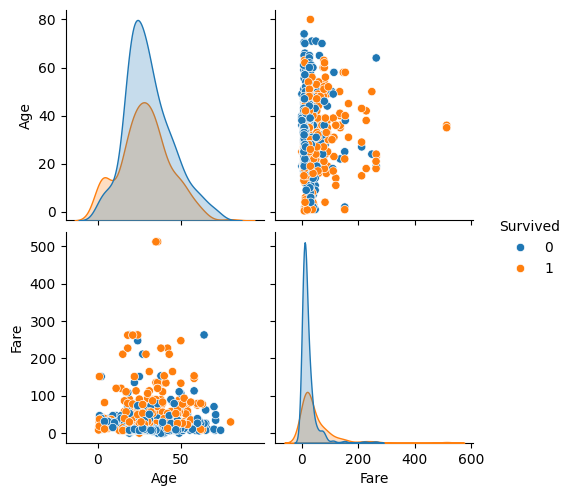

In [26]:
sns.pairplot(data=train, vars=num_cols, hue='Survived')
plt.show()

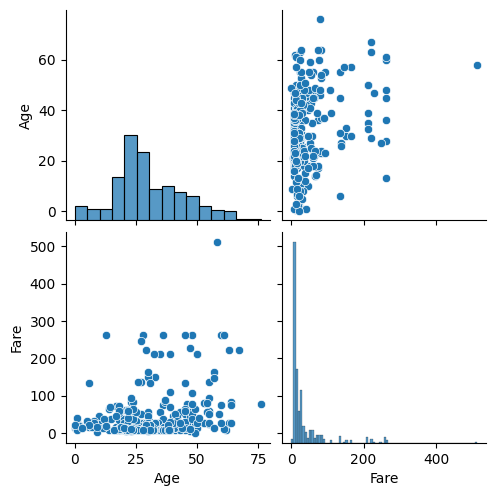

In [27]:
sns.pairplot(data=test, vars=num_cols)
plt.show()

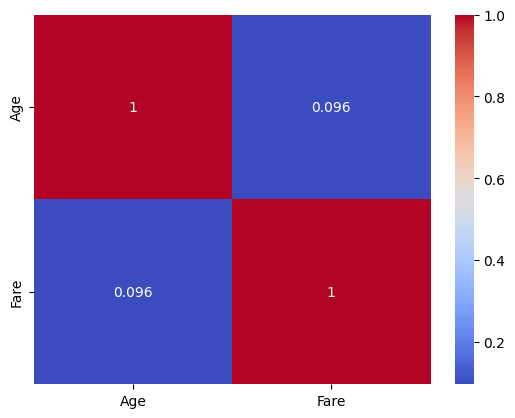

In [28]:
# Correlation matrix for the train data
correlation_matrix = train[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

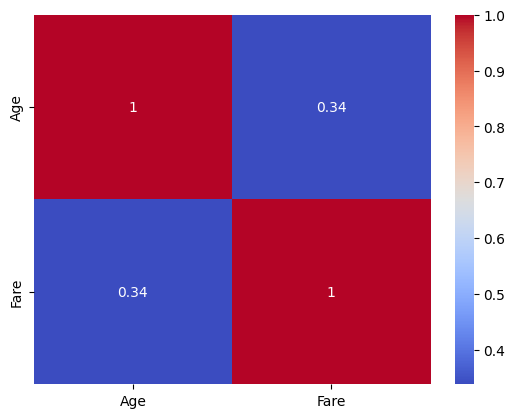

In [29]:
# Correlation matrix for the test data
correlation_matrix = test[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [30]:
# extract the categorical columns where the number of unique values is less than 50
cat_features=[f for f in train.columns if f not in ["PassengerId","Name","Survived"] and train[f].nunique()<50]
cat_features

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

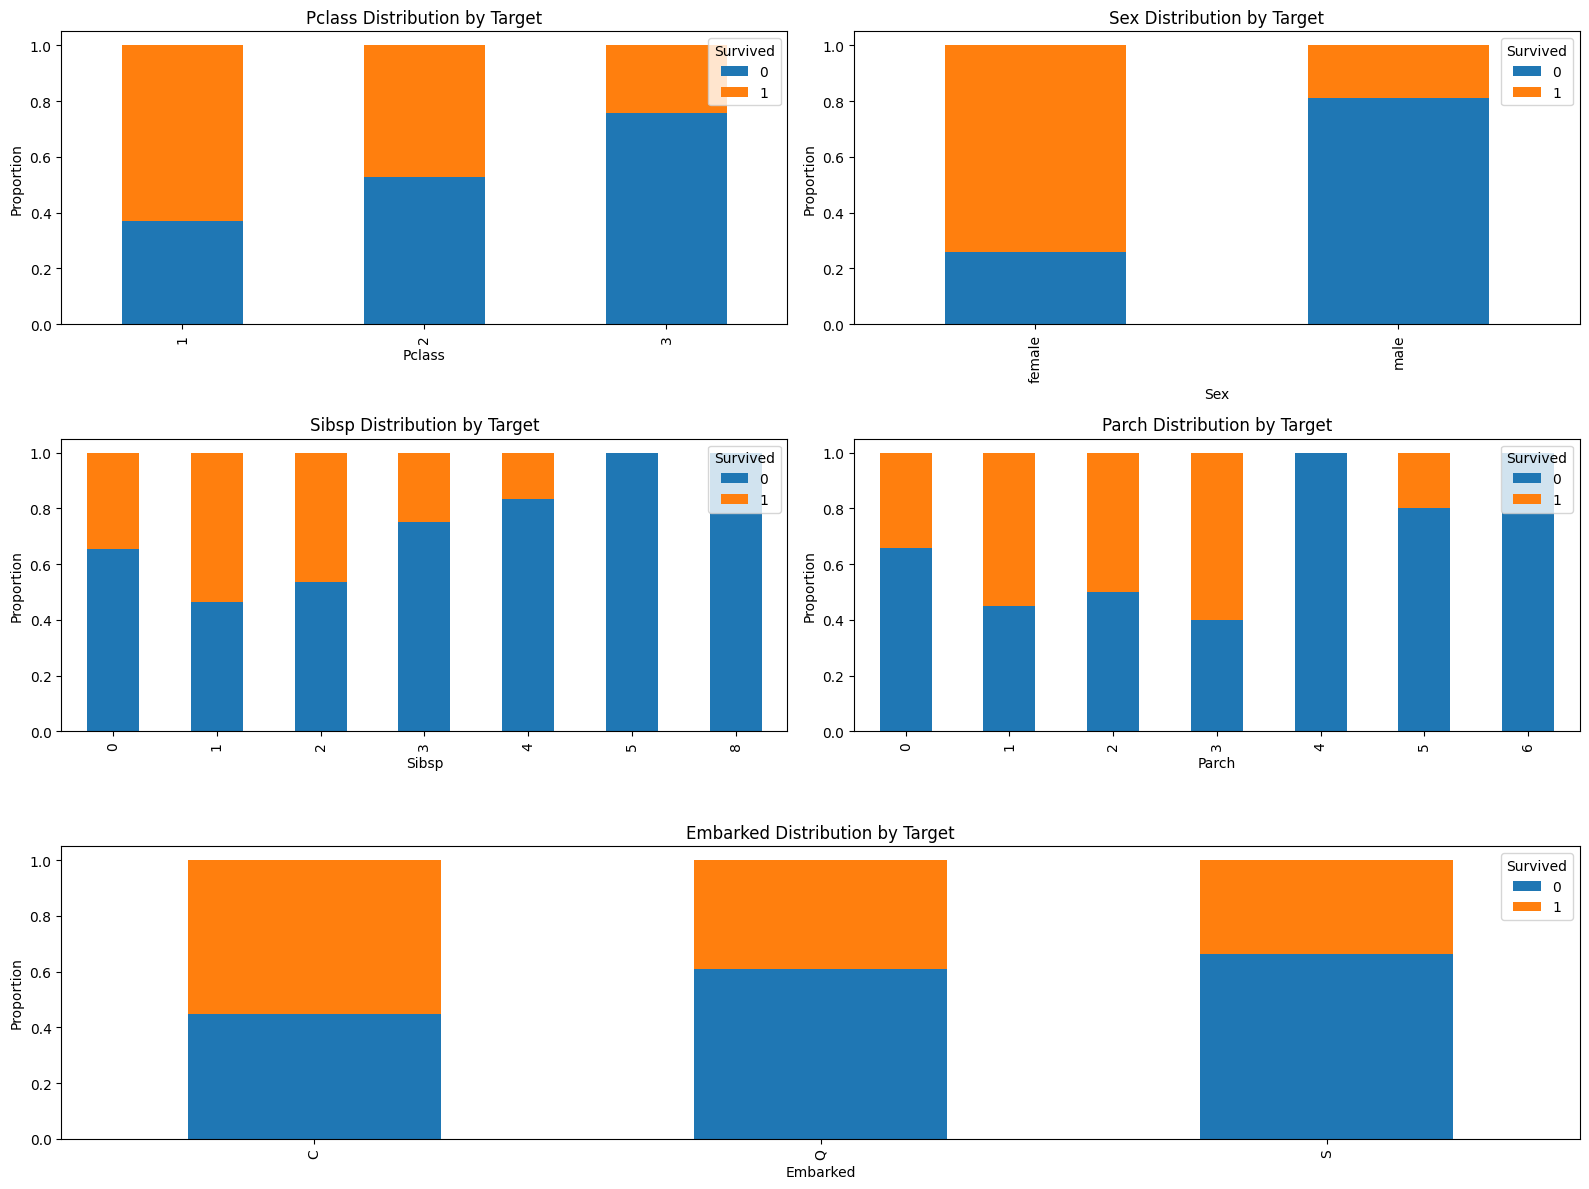

In [31]:
# Create a grid of subplots with 3 rows and 2 columns
fig = plt.figure(figsize=(16, 12))

# Create subplots for the first 4 categorical features
axs = [plt.subplot2grid((3, 2), (i//2, i%2)) for i in range(4)]

# Create a subplot for the last categorical feature that spans both columns of the third row
axs.append(plt.subplot2grid((3, 2), (2, 0), colspan=2))

# Loop through each categorical feature and plot the contingency table in a subplot
for i, col in enumerate(cat_features):
    contingency_table = pd.crosstab(train[col], train[target], normalize='index')
    contingency_table.plot(kind='bar', stacked=True, ax=axs[i])
    axs[i].set_title(f"{col.title()} Distribution by Target")
    axs[i].set_xlabel(col.title())
    axs[i].set_ylabel("Proportion")

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

# Preprocessing

In [32]:
def preprocess(df):
    df = df.copy()
    # Clean the "Name" column
    def normalize_name(x):
        return " ".join([v.strip(",()[].\"'") for v in x.split(" ")])

    def ticket_number(x):
        return x.split(" ")[-1]
    # extract the ticket item and number separately
    def ticket_item(x):
        items = x.split(" ")
        if len(items) == 1:
            return "NONE"
        return "_".join(items[0:-1])

    df["Name"] = df["Name"].apply(normalize_name)
    df["Ticket_number"] = df["Ticket"].apply(ticket_number)
    df["Ticket_item"] = df["Ticket"].apply(ticket_item)
    return df

In [33]:
# Preprocess the train and test data
train = preprocess(train)
test = preprocess(test)

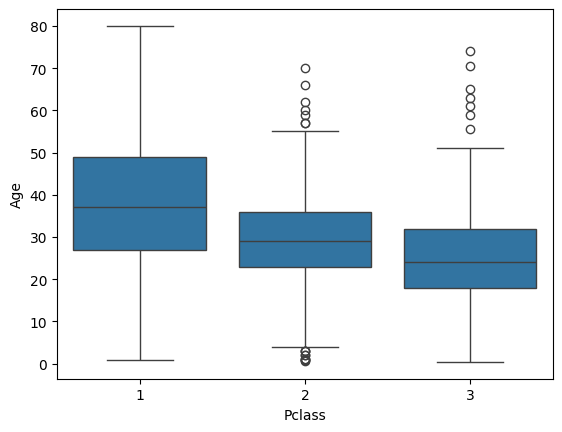

In [34]:
# we start by checking the age for different social classes
sns.boxplot(x='Pclass', y='Age', data=train)
plt.show()

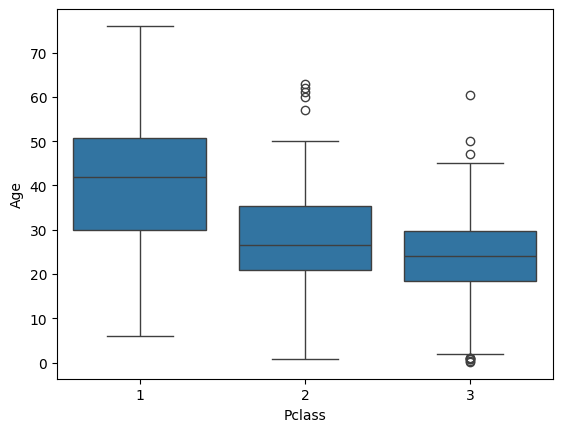

In [35]:
# we start by checking the age for different social classes
sns.boxplot(x='Pclass', y='Age', data=test)
plt.show()

In [36]:
# we calculate the median age for each social class
age_by_pclass = train.groupby('Pclass')['Age'].mean()
age_by_pclass

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [37]:
# now we impute for each class
for pclass, age in age_by_pclass.items():
    train.loc[(train['Age'].isnull()) & (train['Pclass'] == pclass), 'Age'] = age
    test.loc[(test['Age'].isnull()) & (test['Pclass'] == pclass), 'Age'] = age

In [38]:
# number of missing values in the Age columns after imputation
train['Age'].isnull().sum()

0

In [39]:
test['Age'].isnull().sum()

0

In [40]:
# print the missing value row for fare
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item
152,1044,3,Storey Mr Thomas,male,60.5,0,0,3701,NaN,NaN,S,3701,NONE


In [41]:
# average fare fo class 3
fare_by_pclass = train.groupby('Pclass')['Fare'].mean()
fare_by_pclass

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [42]:
test.loc[test['Fare'].isnull(), 'Fare'] = fare_by_pclass[3]

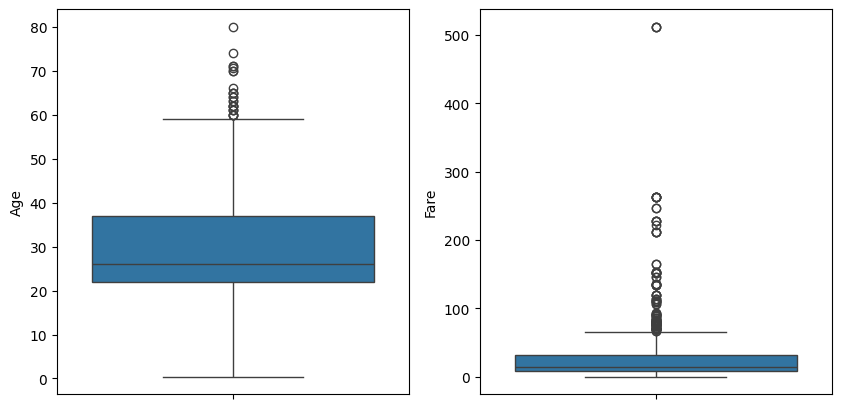

In [43]:
# checking for outliers Age and Fare
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.boxplot(y='Age', data=train, ax=axs[0])
sns.boxplot(y='Fare', data=train, ax=axs[1])
plt.show()

In [44]:
titles_train = train["Name"].str.split().str[1]
train["Name"] = titles_train

titles_test = test["Name"].str.split().str[1]
test["Name"] = titles_test

In [45]:
to_keep = ['Mr', 'Miss', 'Mrs', 'Master']
# if value is not in the list of to_keep, replace it with 'Other'
train.loc[~train["Name"].isin(to_keep), "Name"] = "Other"
test.loc[~test["Name"].isin(to_keep), "Name"] = "Other"

# TFDF

In [46]:
!pip install tensorflow_decision_forests

In [47]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [48]:
input_features = train.columns.tolist()
input_features.remove("Ticket")
input_features.remove("Survived")

print(f"Input features: {input_features}")

Input features: ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Ticket_number', 'Ticket_item']


In [49]:
def tokenize_names(features, labels=None):
    """Divite the names into tokens. TF-DF can consume text tokens natively."""
    features["Name"] =  tf.strings.split(features["Name"])
    return features, labels

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train,label="Survived").map(tokenize_names)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test).map(tokenize_names)

In [50]:
model = tfdf.keras.GradientBoostedTreesModel(
    verbose=0, # Very few logs
    features=[tfdf.keras.FeatureUsage(name=n) for n in input_features],
    exclude_non_specified_features=True, # Only use the features in "features"
    random_seed=1234,
)
model.fit(train_ds)

self_evaluation = model.make_inspector().evaluation()
print(f"Accuracy: {self_evaluation.accuracy} Loss:{self_evaluation.loss}")

Accuracy: 0.8152173757553101 Loss:0.899491548538208


In [51]:
model = tfdf.keras.GradientBoostedTreesModel(
    verbose=0, # Very few logs
    features=[tfdf.keras.FeatureUsage(name=n) for n in input_features],
    exclude_non_specified_features=True, # Only use the features in "features"
    compute_permutation_variable_importance=True,
    min_examples=1,
    categorical_algorithm="RANDOM",
    shrinkage=0.05,
    split_axis="SPARSE_OBLIQUE",
    sparse_oblique_normalization="MIN_MAX",
    sparse_oblique_num_projections_exponent=2.0,
    num_trees=2000,
    random_seed=SEED,

)
model.fit(train_ds)

self_evaluation = model.make_inspector().evaluation()
print(f"Accuracy: {self_evaluation.accuracy} Loss:{self_evaluation.loss}")

Accuracy: 0.8526315689086914 Loss:0.7430371642112732


In [52]:
model.summary()

Model: "gradient_boosted_trees_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (11):
	Age
	Cabin
	Embarked
	Fare
	Name
	Parch
	Pclass
	Sex
	SibSp
	Ticket_item
	Ticket_number

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.           "Sex"  0.429000 ################
    2.           "Age"  0.399257 ##############
    3.          "Fare"  0.277320 ######
    4.   "Ticket_item"  0.187729 
    5.          "Name"  0.186207 
    6. "Ticket_number"  0.180464 
    7.      "Embarked"  0.178099 
    8.         "Parch"  0.177118 
    9.        "Pclass"  0.173882 
   10.         "SibSp"  0.173071 

Variable Importance: MEAN_DECREASE_IN_ACCURACY:
    1. 

In [53]:
def prediction_to_kaggle_format(model, threshold=0.5):
    proba_survive = model.predict(test_ds, verbose=0)[:,0]
    return pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": (proba_survive >= threshold).astype(int)
    })

def make_submission(kaggle_predictions):
    path="/content/submission.csv" #change this depending on where you want to save the submission file
    kaggle_predictions.to_csv(path, index=False)
    print(f"Submission exported to {path}")

kaggle_predictions = prediction_to_kaggle_format(model)
make_submission(kaggle_predictions)

Submission exported to /content/submission.csv


In [54]:
tuner = tfdf.tuner.RandomSearch(num_trials=1000)
tuner.choice("min_examples", [2, 5, 7, 10])
tuner.choice("categorical_algorithm", ["CART", "RANDOM"])

local_search_space = tuner.choice("growing_strategy", ["LOCAL"])
local_search_space.choice("max_depth", [3, 4, 5, 6, 8])

global_search_space = tuner.choice("growing_strategy", ["BEST_FIRST_GLOBAL"], merge=True)
global_search_space.choice("max_num_nodes", [16, 32, 64, 128, 256])

tuner.choice("shrinkage", [0.02, 0.05, 0.10, 0.15])
tuner.choice("num_candidate_attributes_ratio", [0.2, 0.5, 0.9, 1.0])


tuner.choice("split_axis", ["AXIS_ALIGNED"])
oblique_space = tuner.choice("split_axis", ["SPARSE_OBLIQUE"], merge=True)
oblique_space.choice("sparse_oblique_normalization",
                     ["NONE", "STANDARD_DEVIATION", "MIN_MAX"])
oblique_space.choice("sparse_oblique_weights", ["BINARY", "CONTINUOUS"])
oblique_space.choice("sparse_oblique_num_projections_exponent", [1.0, 1.5])

# Tune the model. Notice the `tuner=tuner`.
tuned_model = tfdf.keras.GradientBoostedTreesModel(tuner=tuner)
tuned_model.fit(train_ds, verbose=0)

tuned_self_evaluation = tuned_model.make_inspector().evaluation()
print(f"Accuracy: {tuned_self_evaluation.accuracy} Loss:{tuned_self_evaluation.loss}")

Use /tmp/tmpj7ejumi6 as temporary training directory
Accuracy: 0.8904109597206116 Loss:0.5379554629325867


In [55]:
predictions = None
num_predictions = 0

for i in range(100):
    print(f"i:{i}")
    # Possible models: GradientBoostedTreesModel or RandomForestModel
    model = tfdf.keras.GradientBoostedTreesModel(
        verbose=0, # Very few logs
        features=[tfdf.keras.FeatureUsage(name=n) for n in input_features],
        exclude_non_specified_features=True, # Only use the features in "features"
        random_seed=i,
        honest=True,
    )
    model.fit(train_ds)

    sub_predictions = model.predict(test_ds, verbose=0)[:,0]
    if predictions is None:
        predictions = sub_predictions
    else:
        predictions += sub_predictions
    num_predictions += 1

predictions/=num_predictions

kaggle_predictions = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": (predictions >= 0.5).astype(int)
    })

make_submission(kaggle_predictions)

i:0


i:1


i:2


i:3
i:4
i:5
i:6
i:7
i:8
i:9
i:10
i:11
i:12
i:13
i:14
i:15
i:16
i:17
i:18
i:19
i:20
i:21
i:22
i:23
i:24
i:25
i:26
i:27
i:28
i:29
i:30
i:31
i:32
i:33
i:34
i:35
i:36
i:37
i:38
i:39
i:40
i:41
i:42
i:43
i:44
i:45
i:46
i:47
i:48
i:49
i:50
i:51
i:52
i:53
i:54
i:55
i:56
i:57
i:58
i:59
i:60
i:61
i:62
i:63
i:64
i:65
i:66
i:67
i:68
i:69
i:70
i:71
i:72
i:73
i:74
i:75
i:76
i:77
i:78
i:79
i:80
i:81
i:82
i:83
i:84
i:85
i:86
i:87
i:88
i:89
i:90
i:91
i:92
i:93
i:94
i:95
i:96
i:97
i:98
i:99
Submission exported to /content/submission.csv
